# Pneumonia detection using X-Ray images and Deep Learning

## Introduction

Pneumonia definition...

The aim of this work is to detect Pneumonia by using Deep Learning algorithms and only X-Ray images. Different techniques will be used in order to achieve the best possible results.

## Exploratory Analysis

In [90]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt # plots

from PIL import Image # image
from keras.preprocessing.image import ImageDataGenerator # pre-processing
from keras import layers, models, optimizers # modeling

In [79]:
# Path to data
base_dir = '../input/chest-xray-pneumonia/chest_xray'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [91]:
imagen = plt.imread(os.path.join(train_dir, 'NORMAL/IM-0115-0001.jpeg'))
plt.imshow(imagen)

array([[ 22,  24,  24, ...,  96,  94,  93],
       [ 23,  24,  24, ...,  97,  94,  92],
       [ 24,  24,  23, ...,  99,  96,  94],
       ...,
       [ 49,  50,  48, ..., 119, 119, 119],
       [ 50,  52,  53, ..., 123, 124, 123],
       [ 52,  53,  54, ..., 129, 128, 127]], dtype=uint8)

In [81]:
# Loading images from directory using generator
train_datagen = ImageDataGenerator(rescale=1./255) 
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary' # We only have 2 classes, so class_mode will be 'binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=20,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=4,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [82]:
# Sanity check
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 224, 224, 3)
labels batch shape: (20,)


## Baseline Model - Convolutional Neural Network

In [83]:
model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2))) 
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(1, activation='sigmoid'))

In [84]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

In [85]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [86]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=20,
                              validation_data=val_generator,
                              validation_steps=4)

Epoch 1/20
100/100 [==============================] - 32s 323ms/step - loss: 0.4263 - acc: 0.8065 - val_loss: 0.8353 - val_acc: 0.6250
Epoch 2/20
100/100 [==============================] - 30s 295ms/step - loss: 0.1769 - acc: 0.9365 - val_loss: 0.8443 - val_acc: 0.6250
Epoch 3/20
100/100 [==============================] - 29s 288ms/step - loss: 0.1339 - acc: 0.9499 - val_loss: 0.6048 - val_acc: 0.6875
Epoch 4/20
100/100 [==============================] - 28s 276ms/step - loss: 0.1221 - acc: 0.9560 - val_loss: 0.3372 - val_acc: 0.8750
Epoch 5/20
100/100 [==============================] - 27s 268ms/step - loss: 0.1082 - acc: 0.9575 - val_loss: 0.3414 - val_acc: 0.8750
Epoch 6/20
100/100 [==============================] - 26s 261ms/step - loss: 0.1041 - acc: 0.9580 - val_loss: 0.3235 - val_acc: 0.8750
Epoch 7/20
100/100 [==============================] - 26s 264ms/step - loss: 0.0922 - acc: 0.9700 - val_loss: 0.3553 - val_acc: 0.8750
Epoch 8/20
100/100 [==============================] - 2

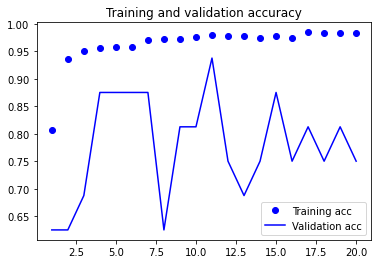

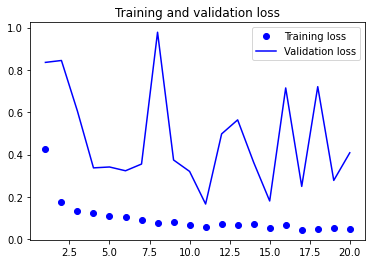

In [87]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [88]:
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50) 
print('test acc:', test_acc)

test acc: 0.7884615659713745


In [89]:
model.save('/kaggle/working/baseline_cnn.h5')